Importer les librairies utiles  COMMENCER PAR PLOT LES DONNEES POUR VOIR UNE TENDANCE

In [1]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

Récupérer le fichier csv au travers d'un data frame

In [3]:
dataset = pd.DataFrame.df = pd.read_csv("crime-in-france.csv")
dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_10,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01
0,1,Règlements de compte entre malfaireurs,8,9,8,8,2,14,15,10,...,8,8,6,5,12,5,2,9,5,11
1,2,Homicides pour voler et à l'occasion de vols,3,2,4,4,6,2,4,6,...,3,4,9,5,4,4,7,6,5,2
2,3,Homicides pour d'autres motifs,67,75,55,52,76,56,51,61,...,84,82,74,75,62,77,76,70,96,60
3,4,Tentatives d'homicides pour voler et à l'occas...,6,5,6,12,4,13,5,24,...,14,5,8,10,14,14,5,9,10,7
4,5,Tentatives homicides pour d'autres motifs,218,238,224,200,208,228,168,165,...,87,95,68,101,85,106,63,104,91,65


Sommes des crimes sur la période (ajout d'une colonne au df)

In [4]:
dataset["somme"] = dataset.iloc[: ,2: ].sum(axis=1)
dataset.head()

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
0,1,Règlements de compte entre malfaireurs,8,9,8,8,2,14,15,10,...,8,6,5,12,5,2,9,5,11,1574
1,2,Homicides pour voler et à l'occasion de vols,3,2,4,4,6,2,4,6,...,4,9,5,4,4,7,6,5,2,795
2,3,Homicides pour d'autres motifs,67,75,55,52,76,56,51,61,...,82,74,75,62,77,76,70,96,60,13854
3,4,Tentatives d'homicides pour voler et à l'occas...,6,5,6,12,4,13,5,24,...,5,8,10,14,14,5,9,10,7,1553
4,5,Tentatives homicides pour d'autres motifs,218,238,224,200,208,228,168,165,...,95,68,101,85,106,63,104,91,65,24245


Récupérer les 10 crimes les plus commis

In [5]:
sort_dataset = dataset.sort_values(by='somme', ascending=False).head(6)
sort_dataset.head(6)

,Index,Libellé index,2017_08,2017_07,2017_06,2017_05,2017_04,2017_03,2017_02,2017_01,...,2000_09,2000_08,2000_07,2000_06,2000_05,2000_04,2000_03,2000_02,2000_01,somme
36,37,Vols à la roulotte,23135,24294,22743,23445,22102,23477,21041,21960,...,39978,44851,45358,43968,44021,37313,38870,35878,33934,6097728
42,43,Autres vols simples contre des particuliers da...,33242,35740,35469,32424,29449,32478,27775,28452,...,23844,27372,25918,26234,25927,21608,25374,23216,22508,6048140
41,42,Autres vols simples contre des particuliers da...,19376,19838,19567,18045,16311,17303,14758,15482,...,16163,18179,17266,17435,16837,13999,15784,14177,13641,3638904
67,68,Destructions et dégradations de véhicules privés,6979,7494,7543,7794,7187,7891,6536,6920,...,22232,20964,24105,25200,25992,22118,25423,22395,21676,3573429
26,27,Cambriolages de locaux d'habitations principales,21013,19060,17048,17337,17184,19808,18716,20975,...,13785,16264,13731,13794,14044,11926,14056,13217,14073,3494742
6,7,Autres coups et blessures volontaires criminel...,18886,20846,22676,20414,18188,20745,17404,18749,...,9524,8828,9532,9864,10079,7980,9427,8391,7907,3226331


Plot des crimes par Années (Beaucoup de graph ! avant de lancer)

In [6]:
# months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
# for years in range(2000, 2016) : 
#     ds_years  = sort_dataset.iloc[:, :-1].filter(like=str(years))
#     ds_years = pd.concat([sort_dataset['Libellé index'], ds_years], axis = 1)
#     plt.figure(figsize=(16,10))
#     for i in range(len(ds_years)) :
#         plt.plot(months, ds_years.iloc[i, 1:], label = f'{ds_years.iloc[i,0]} - {years}')
#         plt.title(f'{years}')
#         plt.legend(loc='upper right')

Plot des même crimes au travers des ans  

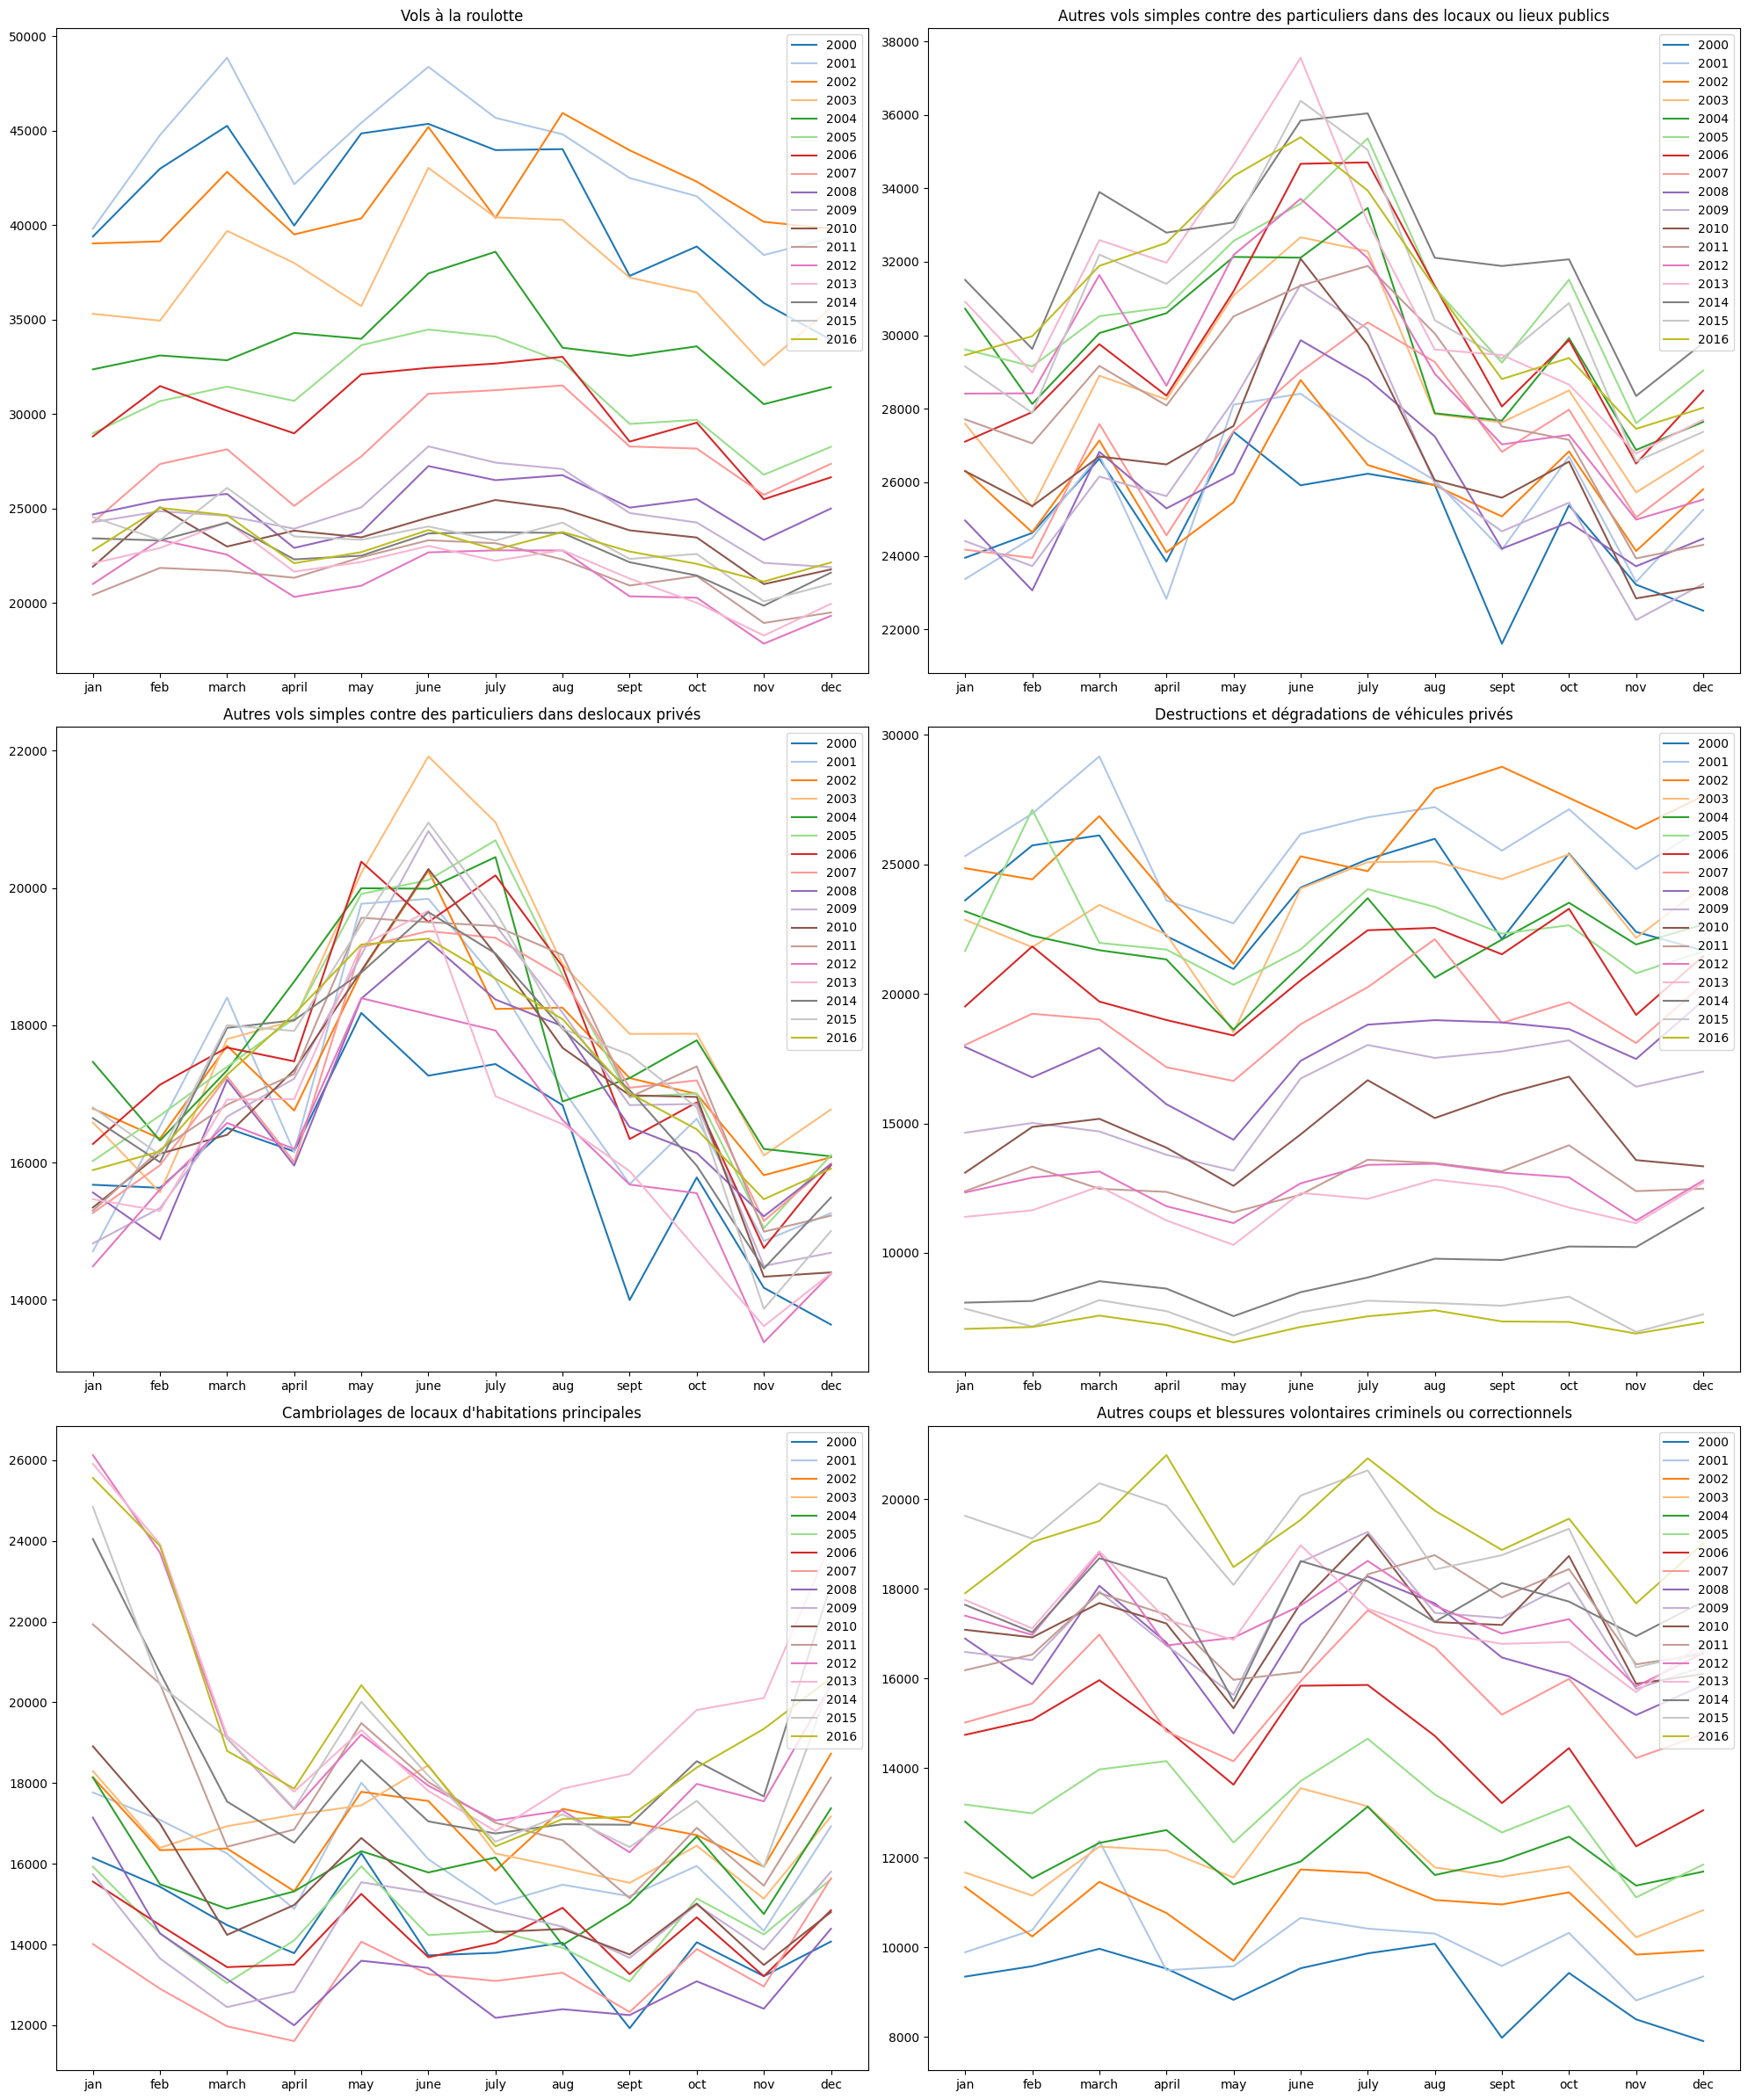

In [7]:
months = ['jan', 'feb', 'march', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec']
crimes = []

dict_crimes = {}
for crime in sort_dataset['Libellé index'] :
    temp_crime = sort_dataset[sort_dataset['Libellé index'] == str(crime)]
    crimes.append(crime)
    dict_crimes[f'df_{crime}'] = temp_crime


#plot des crimes par mois sur une année
fig, ax = plt.subplots(3,2, figsize = (20,24))
color_map = plt.get_cmap('tab20')

for i, crime in enumerate(crimes):
    for j, year in enumerate(range(2000, 2017)):
        color = color_map(j)
        # Utilisation de l'indice (i) pour parcourir les lignes et l'indice (j) pour parcourir les colonnes
        ax[i // 2, i % 2].plot(months, dict_crimes[f'df_{crime}'].filter(like=str(year)).iloc[0], label=str(year), color = color)
        ax[i // 2, i % 2].set_title(f'{crime}')
        ax[i // 2, i % 2].legend(loc='upper right')

plt.tight_layout()
plt.show()



Code test Charles 

In [8]:


# Filtrer les données pour la période de 2000 à 2016
dataset = sort_dataset

# Grouper les données par mois, année et type de crime et compter le nombre de crimes
crime_counts = dataset.groupby(['', 'type_de_crime']).size().reset_index(name='nombre_de_crimes')

# Agréger les données pour obtenir le nombre moyen de crimes par mois et par type de crime
average_crime_counts = crime_counts.groupby(['mois', 'type_de_crime'])['nombre_de_crimes'].mean().reset_index()

# Tracer les diagrammes en bâtons
fig, ax = plt.subplots(figsize=(10, 6))

# Boucle à travers les types de crime uniques et tracer un diagramme en bâtons pour chaque
for crime_type in average_crime_counts['type_de_crime'].unique():
    data = average_crime_counts[average_crime_counts['type_de_crime'] == crime_type]
    ax.bar(data['mois'], data['nombre_de_crimes'], label=crime_type)

ax.set_xlabel('Mois')
ax.set_ylabel('Nombre moyen de crimes')
ax.set_title('Nombre moyen de crimes par mois (2000-2016)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: ''